In [2]:
import numpy as np
import scipy.integrate as spi
import matplotlib.pyplot as plt
from scipy import pi
from matplotlib.colors import Normalize
import matplotlib.cm as cm
import random

# **1. Simple ezymatic catalytic reaction**

# equation system

$$\frac{d[S]}{dt}=-k_1[E][S]+k_{-1}[ES]$$
$$\frac{d[E]}{dt}=-k_1[E][S]+(k_{-1}+k_2)[ES]$$
$$\frac{d[ES]}{dt}=k_1[E][S]-(k_{-1}+k_2)[ES]$$
$$\frac{d[P]}{dt}=k_2[ES]\equiv v$$

$[S]$ : substrate concentration <br>
$[E]$ : enzyme concentration <br>
$[ES]$: enzyme-substrate complex <br>
$[P]$: product <br>
$k_1$ : rate constante of ES complex formation <br>
$k_{-1}$ : rate constante of ES complexe dissociation <br>
$k_2$ : rate constante of product formation 

# Evolution of concentrations for 5 time units

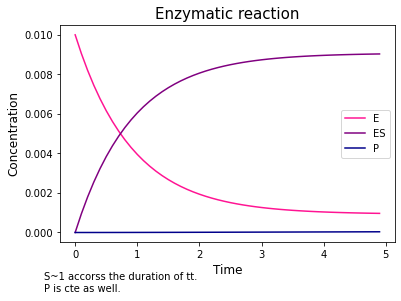

In [3]:
Ei=0.01   #y[1]
Si=1      #y[0]
ESi=0     #y[2]
Pi=0      #y[3]
k1_p=1
k1_m=0.1
k2=0.001

KM=(k1_m+k2)/k1_p

t0=0
Tf=5
dt=0.1 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

#plt.plot(tt,y_solution[0],'deepskyblue',label="S")
plt.plot(tt,y_solution[1],'deeppink',label="E")
plt.plot(tt,y_solution[2],'purple',label="ES")
plt.plot(tt,y_solution[3],'darkblue',label="P")
#plt.hlines(xmin=0,xmax=tt[-1],y=y_solution[2][-1],color='black',label="Vmax",
#          linewidth=0.8,linestyle="dashed")
#plt.hlines(xmin=0,xmax=tt[-1],y=y_solution[2][-1]/2,color='red',label="Vmax/2",
#          linewidth=1.8,linestyle="dashed")
#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
plt.legend(loc="best")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
plt.text(s="S~1 accorss the duration of tt.\nP is cte as well.",y=-0.003,x=-0.5)
plt.show()

# Evolution of concentrations for 100,000 time units

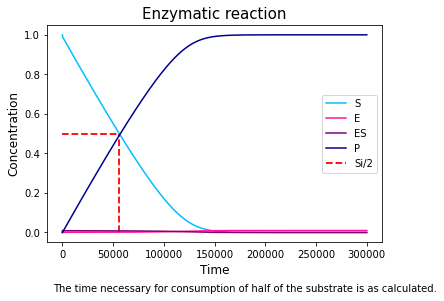

In [109]:
t0=0
Tf=300000
dt=10 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

plt.plot(tt,y_solution[0],'deepskyblue',label="S")
plt.plot(tt,y_solution[1],'deeppink',label="E")
plt.plot(tt,y_solution[2],'purple',label="ES")
plt.plot(tt,y_solution[3],'darkblue',label="P")

plt.vlines(ymin=0,ymax=0.5,x=55555,color='red',
          linewidth=1.8,linestyle="dashed")
plt.hlines(xmin=0,xmax=55555,y=y_solution[0][0]/2,color='red',label="Si/2",
         linewidth=1.8,linestyle="dashed")

plt.legend(loc="best")
plt.xlabel("Time", fontsize=12)
plt.ylabel("Concentration", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",y=-0.3,x=-9000)
plt.show()

<ipython-input-131-29d91af7e7f5>:17: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(y_solution[0],y_solution[3]/tt,'green',label="P vs. S")


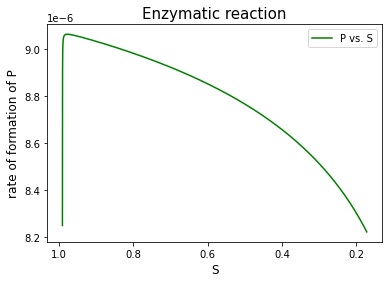

In [131]:
t0=0
Tf=100000
dt=10 #time step
tt=np.arange(t0,Tf,dt) #arrange into array because odeint takes an array for t arg

def f(y,t,k1_p,k1_m,k2):
    z=np.zeros(np.size(y))
    z[0]=-k1_p*y[1]*y[0]+k1_m*y[2]
    z[1]=-k1_p*y[1]*y[0]+(k1_m+k2)*y[2]
    z[2]=k1_p*y[1]*y[0]-(k1_m+k2)*y[2]
    z[3]=k2*y[2]
    return z

y0=np.array([Si,Ei,ESi,Pi])
y_solution=spi.odeint(f,y0,tt,args=(k1_p,k1_m,k2)).T #transpose

plt.plot(y_solution[0],y_solution[3]/tt,'green',label="P vs. S")

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
plt.legend(loc="best")
plt.xlabel("S", fontsize=12)
plt.gca().invert_xaxis()
plt.ylabel("rate of formation of P", fontsize=12)
plt.title("Enzymatic reaction", fontsize="15")
#plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
plt.show()

# Comments

The enzyme was saturated after a few units of time (4-5), as shown on the first plot. The concentrations of E and ES were since then stationary. It took ~55,555 time units to consume half of the substrate (plot 2). The rate was at its peak while the substrate was at its highest concentrateion as well. The vmax (=the highest rate) is slighty above calculated 9xe-6 (plot 3). 

# Michaelis-Menten equation 

Plot $[P] ~ [S]$ using :

$$ v=\frac{d[P]}{dt}=\frac{vmax[S]}{Km+[S]}$$


vmax=9e-06
Km=0.101


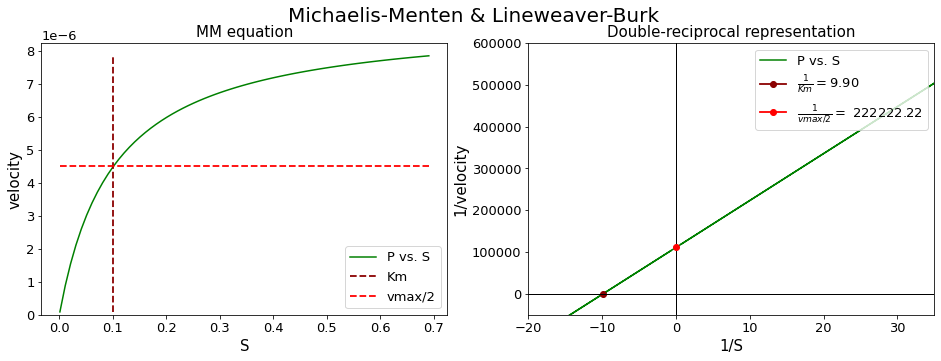

In [142]:
vmax=0.009*k2;  print("vmax={}".format(vmax))
Km=(k1_m+k2)/k1_p;   print("Km={}".format(Km))

def MM(vmax,Km,S):
    dP=[vmax*s/(Km+s) for s in S]
    return dP

S=np.arange(0.001,0.7,0.01)
P=MM(vmax=vmax,Km=Km,S=S)
# plt.plot(S,P,'green',label="P vs. S")

# #plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
# plt.vlines(ymin=P[0],ymax=P[-1],x=Km,color='darkred',
#           linewidth=1.8,linestyle="dashed",label="Km")
# plt.hlines(xmin=S[0],xmax=S[-1],y=vmax/2,color='red',label="vmax/2",
#          linewidth=1.8,linestyle="dashed")
# plt.legend(loc="lower right")
# plt.xlabel("S", fontsize=12)
# #plt.gca().invert_xaxis()
# plt.ylabel("rate of formation of P", fontsize=12)
# plt.title("MM equation", fontsize="15")

# #plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
# plt.show()

fig, (ax1,ax2) =plt.subplots(1,2, figsize = (16,5))
fig.suptitle("Michaelis-Menten & Lineweaver-Burk", fontsize = 20)
plt.rc("font", size = 13)

#AX1
ax1.plot(S,P,'green',label="P vs. S")

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
ax1.vlines(ymin=P[0],ymax=P[-1],x=Km,color='darkred',
          linewidth=1.8,linestyle="dashed",label="Km")
ax1.hlines(xmin=S[0],xmax=S[-1],y=vmax/2,color='red',label="vmax/2",
         linewidth=1.8,linestyle="dashed")
ax1.legend(loc="lower right")
ax1.set(xlabel = "S", ylabel = "velocity")
ax1.set_title("MM equation", fontsize="15")
ax1.set_ylim(0)
ax1.xaxis.label.set_size(15)
ax1.yaxis.label.set_size(15)

#AX2
ax2.plot([1/s for s in np.linspace(-1.5, 1.5, 100)], 
         [(Km+s)/(vmax*s) for s in np.linspace(-1.5, 1.5, 100)],'green',label="P vs. S")

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')

ax2.legend(loc="lower right")
ax2.set(xlabel = "1/S", ylabel = "1/velocity")
ax2.set_title("Double-reciprocal representation", fontsize="15")

ax2.plot(-1/Km,0,color='darkred', marker="o",
          linewidth=1.8,label= r'$\frac{1}{Km} =$' +"{:.2f}".format(1/Km))
ax2.axvline(x=0,color='black',
          linewidth=1)
ax2.plot(0,1/vmax,marker = "o",color='red',label= r'$\frac{1}{vmax/2} = $' +" {:.2f}".format(1/(vmax/2)),
         linewidth=1.8)
ax2.axhline(y=0,color='black',
          linewidth=1)
ax2.legend()
ax2.set_ylim(-50000,600000)
ax2.set_xlim(-20,35)
ax2.xaxis.label.set_size(15)
ax2.yaxis.label.set_size(15)
#ax2.invert_xaxis()
#ax2.invert_yaxis()

#plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)

The reaction would produce P at the half of the maximum rate with initial concentration of S = Km = 0.101.

# **2. Competitive inhibitor**

$$\frac{d[E_{tot}]}{dt} = \frac{d[E_0]}{dt}= [E] + [ES] + [EI] = [E].(1+\frac{[S]}{K_M}+\frac{[I]}{K_I})$$

$$\frac{d[ES]}{dt} = \frac{[S]}{K_M}.(\frac{E_0}{1+\frac{[S]}{K_M}+\frac{[I]}{K_I}})$$

$$\frac{d[P]}{dt}=\frac{k_2[S][E_0]}{K_M (1+\frac{[S]}{K_M}+\frac{[I]}{K_I})} =\frac{k_2[S][E_0]}{K_M.(1+\frac{[I]}{K_I}) + [S]} = \frac{vmax[S]}{K_M\alpha+[S]}$$

$$\alpha = 1+\frac{I}{K_I}$$

Higher the $\alpha$, smaller amount of P will be formed. To increase alpha, either the initial concentration of the inhibitor should be large or constante of inhibition small. 

With enough of substrate, the original vmax can be achieved, because there will be enough of S to compete for the enzyme binding site.

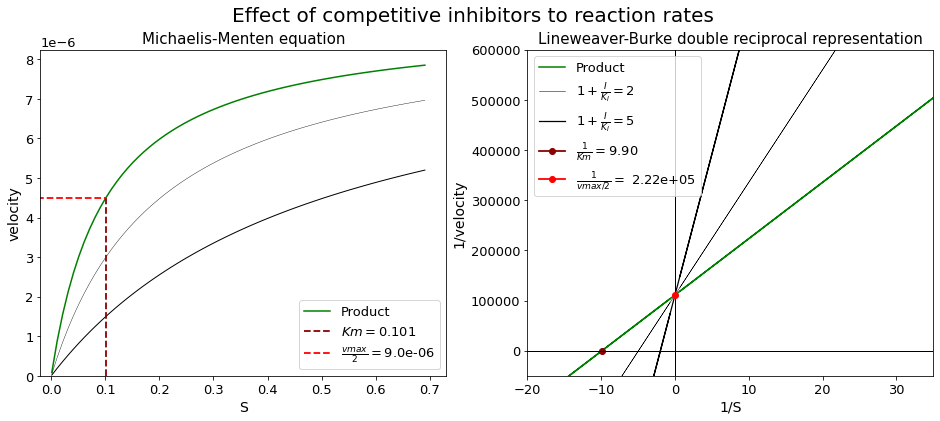

In [186]:
fig, (ax1,ax2) =plt.subplots(1,2, figsize = (16,6))
fig.suptitle("Effect of competitive inhibitors to reaction rates", fontsize = 20)
plt.rc("font", size = 13)

#AX1---------------------------------------------------------------------------------
ax1.plot(S,P,'green',label="Product")
for alpha in [2,5]:
    ax1.plot([s for s in S],
         [(vmax*s)/(Km*alpha + s) for s in S], 'black', linewidth = 0.2*alpha)

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')
ax1.vlines(ymin=0,ymax=vmax/2,x=Km,color='darkred',
          linewidth=1.8,linestyle="dashed",label= r'$Km = $' +"{:.3f}".format(Km))
ax1.hlines(xmin=-0.1,xmax=Km,y=vmax/2,color='red',label= r'$\frac{vmax}{2} = $' +"{:.1e}".format(vmax),
         linewidth=1.8,linestyle="dashed")
ax1.legend(loc="lower right")
ax1.set(xlabel = "S", ylabel = "velocity")
ax1.set_title("Michaelis-Menten equation", fontsize="15")
ax1.set_ylim(0)
ax1.set_xlim(-0.02)
ax1.xaxis.label.set_size(14)
ax1.yaxis.label.set_size(14)

#AX2------------------------------------------------------------------------------------
ax2.plot([1/s for s in np.linspace(-1.5, 1.5, 100)], 
         [(Km+s)/(vmax*s) for s in np.linspace(-1.5, 1.5, 100)],'green',label="Product")
for alpha in [2,5]:
    ax2.plot([1/s for s in np.linspace(-1.5, 1.5, 100)], 
             [(Km*alpha+s)/(vmax*s) for s in np.linspace(-1.5, 1.5, 100)],'black',
             label=r'$1+\frac{I}{K_I} = $'+f'{alpha}', linewidth = 0.25*alpha)

#plt.plot(y_solution[:,1],y_solution[:,0],'deeppink',label='Y')

ax2.legend(loc="lower right")
ax2.set(xlabel = "1/S", ylabel = "1/velocity")
ax2.set_title("Lineweaver-Burke double reciprocal representation", fontsize="15")

ax2.plot(-1/Km,0,color='darkred', marker="o",
          linewidth=1.8,label= r'$\frac{1}{Km} =$' +"{:.2f}".format(1/Km))
ax2.axvline(x=0,color='black',
          linewidth=1)
ax2.plot(0,1/vmax,marker = "o",color='red',label= r'$\frac{1}{vmax/2} = $' +" {:.2e}".format(1/(vmax/2)),
         linewidth=1.8)
ax2.axhline(y=0,color='black',
          linewidth=1)
ax2.legend()
ax2.set_ylim(-50000,600000)
ax2.set_xlim(-20,35)
ax2.xaxis.label.set_size(14)
ax2.yaxis.label.set_size(14)
#ax2.invert_xaxis()
#ax2.invert_yaxis()

#plt.text(s="The time necessary for consumption of half of the substrate is as calculated.",loc="best")
plt.show()

# fig, (ax1, ax2) = plt.subplots(1, 2)
# fig.suptitle('Horizontally stacked subplots')
# ax1.plot(x, y)
# ax2.plot(x, -y)